# Ejercicios de AlphaFold y PyMOL

## Proteína Seleccionada: Cytochrome c (CYCS)

<img src="images/cytochrome_c_structure.png" width="500">

### Información General

| Propiedad | Valor |
|-----------|-------|
| **Nombre** | Cytochrome c (CYCS) |
| **UniProt ID** | P99999 |
| **PDB Experimental** | 1HRC |
| **Longitud** | 105 aminoácidos |
| **Peso Molecular** | ~12 kDa |
| **Organismo** | Homo sapiens |
| **Función** | Transferencia de electrones en cadena respiratoria |
| **Localización** | Espacio intermembrana mitocondrial |
| **Cofactor** | Grupo heme c (covalentemente unido) |

### Función Biológica

<img src="images/cytochrome_c_function.png" width="500">

**Cytochrome c** es una proteína esencial con dos funciones principales:

1. **Cadena de transporte de electrones**: Transfiere electrones entre el Complejo III y IV en la mitocondria
2. **Señalización de apoptosis**: Cuando se libera al citosol, inicia la muerte celular programada

**Características estructurales clave:**
- Grupo heme unido covalentemente a Cys14 y Cys17
- Ligandos del hierro: His18 y Met80
- Loop Ω (residuos 70-85): región flexible importante

### Recursos para Análisis

| Recurso | URL | Propósito |
|---------|-----|----------|
| **PDB Experimental** | https://files.rcsb.org/download/1HRC.pdb | Estructura de referencia |
| **AlphaFold** | https://alphafold.ebi.ac.uk/entry/AF-P99999-F1 | Predicción AlphaFold |
| **UniProt** | https://www.uniprot.org/uniprotkb/P99999 | Secuencia y anotaciones |

### Plan de Análisis AlphaFold

| Aspecto | Pregunta de Investigación |
|---------|---------------------------|
| **Precisión global** | ¿Qué RMSD tiene la predicción vs estructura experimental? |
| **Sitio activo** | ¿Predice correctamente la geometría del heme? |
| **Confianza (pLDDT)** | ¿Qué regiones tienen menor confianza? |
| **Flexibilidad** | ¿Captura la flexibilidad del loop Ω? |
| **Residuos clave** | ¿Identifica His18 y Met80 correctamente? |

---

## Bloque 1 - Descarga de secuencia desde UniProt

En este bloque se debe obtener la información fundamental de la proteína asignada, comenzando por consultar su
entrada en UniProt (https://www.uniprot.org/) mediante el identificador proporcionado en el enunciado. Tras localizar
la proteína, revisar brevemente su descripción biológica: función principal, organismo de origen, longitud de la
secuencia, familia o dominios relevantes y cualquier anotación importante incluida en la ficha. A continuación,
descargar la secuencia en formato FASTA utilizando la opción “Download → FASTA” disponible en la propia página de
UniProt. Una vez guardado el archivo verificar su contenido mostrando por pantalla la longitud total y los primeros 20
aminoácidos de la secuencia.

-----

Se ha descargado la secuencia de la proteína Cytochrome c (P99999) desde UniProt en formato FASTA mediante este enlace: https://rest.uniprot.org/uniprotkb/P99999.fasta

In [19]:
from Bio import SeqIO
import requests
import os

In [20]:
uniprot_id = "P99999"
os.makedirs("fasta", exist_ok=True)
file_path = f"fasta/{uniprot_id}.fasta"
url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta"

Hemos desarrollado el código para que, si no existe el archivo, se pueda descargar de manera automática. Esto facilita que si quieres lonar el repositorio, no tengas que preocuparte por descargar la secuencia manualmente.

In [21]:
if not os.path.exists(file_path):
    print(f"Descargando secuencia de UniProt ({uniprot_id})...")
    try:
        response = requests.get(url)
        response.raise_for_status()
        with open(file_path, "w") as f:
            f.write(response.text)
        print("Descarga exitosa.")
    except Exception as e:
        print(f"Error en la descarga: {e}")
else:
    print(f"Archivo {file_path} ya existe.")

Archivo fasta/P99999.fasta ya existe.


### Descripción biológica que obtuvimos de la búsqueda de Cytochrome c (P99999)

| Propiedad | Descripción |
| :--- | :--- |
| **Organismo** | *Homo sapiens* (Humano) |
| **Longitud** | 105 aminoácidos |
| **Peso Molecular** | ~12 kDa (Pequeña y compacta) |
| **Familia** | Cytochrome c family |

#### Es vital para...

actuar como mensajero en la mitocondria, transportando electrones entre complejos (del III al IV) para que podamos producir energía (ATP). Sin embargo, cuando la célula está dañada, el citocromo c escapa al citoplasma y activa la apoptosis, que es básicamente el proceso de muerte celular controlada.

#### Como datos curiosos...

Es sorprendente lo poco que ha cambiado esta proteína a lo largo de millones de años. Es tan parecida entre especies que podrías poner un citocromo c humano en una planta o levadura y funcionaría perfectamente, como si fuera un repuesto universal. De hecho, gracias a esta estabilidad evolutiva se usó para crear los primeros árboles genealógicos de las especies.

Su nombre significa literalmente "color celular" (*cyto* + *chroma*) porque el hierro que lleva en su interior le da un color rojo intenso, muy parecido al de la sangre. Además, es increíblemente resistente al calor y al ácido, lo que la convirtió en la "rata de laboratorio" favorita para estudiar cómo se pliegan las proteínas durante décadas.

In [22]:
record = SeqIO.read(file_path, "fasta")
    
print("=" * 60)
print(f"INFORMACIÓN DE LA SECUENCIA: {record.id}")
print("=" * 60)
print(f"Descripción: {record.description}")
print(f"Longitud: {len(record.seq)} aminoácidos")
print("-" * 60)
print(f"Primeros 20 AA: {record.seq[:20]}")
print("-" * 60)
print("Secuencia completa:")
print(record.seq)

INFORMACIÓN DE LA SECUENCIA: sp|P99999|CYC_HUMAN
Descripción: sp|P99999|CYC_HUMAN Cytochrome c OS=Homo sapiens OX=9606 GN=CYCS PE=1 SV=2
Longitud: 105 aminoácidos
------------------------------------------------------------
Primeros 20 AA: MGDVEKGKKIFIMKCSQCHT
------------------------------------------------------------
Secuencia completa:
MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE


## Bloque 2 - Descarga del modelo AlphaFold

Acceder a la base de datos AlphaFold (https://alphafold.ebi.ac.uk/) e introducir el identificador UniProt de la proteína
para acceder a su modelo estructural predicho. Desde la página correspondiente, descarga el archivo en formato PDB
y cárgalo en Python para visualizar la estructura tridimensional utilizando py3Dmol. A continuación, comparar la
visualización con la mostrada en la propia web de AlphaFold, revisando aspectos como la forma general de la proteína
y el patrón de colores asociado a los valores de confianza (pLDDT).

In [23]:
import os
import requests
import py3Dmol

pdb_url = "https://alphafold.ebi.ac.uk/files/AF-P99999-F1-model_v6.pdb"
pdb_file = "pdb/AF-P99999-F1-model_v6.pdb"
os.makedirs("pdb", exist_ok=True)

if not os.path.exists(pdb_file):
    print(f"Descargando modelo AlphaFold ({pdb_file})...")
    try:
        response = requests.get(pdb_url)
        response.raise_for_status()
        with open(pdb_file, "w") as f:
            f.write(response.text)
        print("Descarga exitosa.")
    except Exception as e:
        print(f"Error en la descarga: {e}")
else:
    print(f"Archivo {pdb_file} ya existe.")

view = py3Dmol.view(width=800, height=600)
if os.path.exists(pdb_file):
    with open(pdb_file, 'r') as f:
        view.addModel(f.read(), 'pdb')
    
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.zoomTo()
    view.show()
else:
    print("No se pudo cargar la estructura para visualización.")

Archivo pdb/AF-P99999-F1-model_v6.pdb ya existe.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

A continuación se muestra la imagen obtenida desde la web de AlphaFold, lo que nos permite comparar las diferencias entre nuestra visualización y la ofrecida en la plataforma oficial.

![AlphaFold visualization](images/visualization_web_alphafold.png)

Es importante destacar que la visualización obtenida con py3Dmol no muestra inicialmente los mismos colores de confianza (pLDDT) que la web de AlphaFold. 

Esto lo consideramos normal, ya que el visor de AlphaFold aplica automáticamente su escala de colores basada en pLDDT, mientras que py3Dmol utiliza un esquema por defecto. Para replicar la visualización oficial, es necesario colorear la estructura según los valores pLDDT almacenados en el campo B-factor del archivo PDB.

In [24]:
import os
import requests
import py3Dmol

pdb_url = "https://alphafold.ebi.ac.uk/files/AF-P99999-F1-model_v6.pdb"
pdb_file = "pdb/AF-P99999-F1-model_v6.pdb"
os.makedirs("pdb", exist_ok=True)

if not os.path.exists(pdb_file):
    print(f"Descargando modelo AlphaFold ({pdb_file})...")
    try:
        response = requests.get(pdb_url)
        response.raise_for_status()
        with open(pdb_file, "w") as f:
            f.write(response.text)
        print("Descarga exitosa.")
    except Exception as e:
        print(f"Error en la descarga: {e}")
else:
    print(f"Archivo {pdb_file} ya existe.")

view = py3Dmol.view(width=800, height=600)

if os.path.exists(pdb_file):
    with open(pdb_file, 'r') as f:
        view.addModel(f.read(), 'pdb')

    view.setStyle({
        'cartoon': {
            'colorscheme': {
                'prop': 'b',       
                'gradient': 'roygb',
                'min': 0,          
                'max': 100         
            }
        }
    })

    view.zoomTo()
    view.show()
else:
    print("No se pudo cargar la estructura para visualización.")

Archivo pdb/AF-P99999-F1-model_v6.pdb ya existe.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Bloque 3 - Extraer pLDDT del PDB

Analizar la calidad del modelo predicho por AlphaFold extrayendo los valores de pLDDT que aparecen en el archivo
PDB. Estos valores, que indican el nivel de confianza de la predicción para cada átomo, se encuentran almacenados en
la columna B-Factor de todas las líneas que comienzan por ATOM. Para ello, deberás cargar el archivo PDB en Python
y recorrer sus líneas para:

    • identificar las entradas ATOM.
    • leer el valor de pLDDT correspondiente.
    • asignar un único valor por residuo (por ejemplo, tomando el primero o el promedio por residuo).

Una vez obtenida la serie completa de valores pLDDT, calcula dos indicadores básicos:

    • el pLDDT medio de toda la estructura.
    • el porcentaje de residuos con pLDDT > 70, ya que estos representan las regiones predichas con mayor fiabilidad.

Estos resultados permitirán contextualizar la calidad global del modelo y serán utilizados en los bloques posteriores
de visualización y análisis.

In [25]:
import numpy as np

In [26]:
plddt_values = []
pdb_file = "pdb/AF-P99999-F1-model_v6.pdb"

In [27]:
with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM') and line[12:16].strip() == 'CA':
            plddt = float(line[60:66].strip())
            plddt_values.append(plddt)

plddt_values = np.array(plddt_values)

La serie completa de valores pLDDT para el modelo AlphaFold descargado es:

In [28]:
print(plddt_values)

[75.75 95.19 98.44 98.38 98.5  98.69 98.81 98.69 98.75 98.75 98.81 98.5
 98.25 98.5  98.62 98.06 97.94 98.69 98.88 98.69 98.69 98.06 98.   96.69
 97.88 98.06 98.5  98.12 97.88 98.5  98.69 98.75 98.75 98.62 98.19 98.62
 98.5  98.25 98.25 98.5  98.56 98.25 98.25 98.12 96.88 97.56 98.44 98.12
 98.38 98.06 98.12 98.25 98.19 97.88 98.06 98.19 96.62 98.38 98.62 98.69
 98.25 98.   98.06 98.62 98.75 98.5  98.5  98.75 98.69 98.75 98.56 98.5
 98.   98.25 98.38 98.44 98.25 97.31 97.75 96.25 98.   97.06 98.12 97.38
 98.25 98.62 98.38 98.25 98.25 98.44 98.62 98.75 98.75 98.81 98.88 98.75
 98.62 98.75 98.69 98.25 98.06 98.31 98.5  96.88 86.88]


In [29]:
mean_plddt = sum(plddt_values) / len(plddt_values)
percent_high = sum(1 for p in plddt_values if p > 70) / len(plddt_values) * 100

print(f"pLDDT medio: {mean_plddt:.2f}")
print(f"% residuos >70: {percent_high:.1f}%")

pLDDT medio: 97.93
% residuos >70: 100.0%


El modelo muestra una confianza muy alta, con un pLDDT medio de 97.93. Además, todos los residuos superan el valor de 70, por lo que la estructura completa se considera fiable para interpretarla sin problemas.

## Bloque 4 - Gráfico de pLDDT por residuo

Representar gráficamente la calidad de la predicción estructural generando un gráfico lineal donde cada punto
corresponda al valor de pLDDT de un residuo. Para ello, se debe crear una figura en la que el eje X represente el índice
del residuo a lo largo de la secuencia y el eje Y el valor de pLDDT obtenido en el bloque anterior. Es recomendable
añadir una línea horizontal en pLDDT = 70, ya que este umbral permite distinguir visualmente las regiones predichas
con alta confianza de aquellas más inciertas. Una vez obtenido el gráfico, interpreta brevemente los resultados:

    • Identifica qué zonas presentan valores altos y, por tanto, mayor estabilidad estructural.

    • Señala las regiones donde los valores disminuyen, indicando posible flexibilidad o desorden.

In [30]:
import matplotlib.pyplot as plt

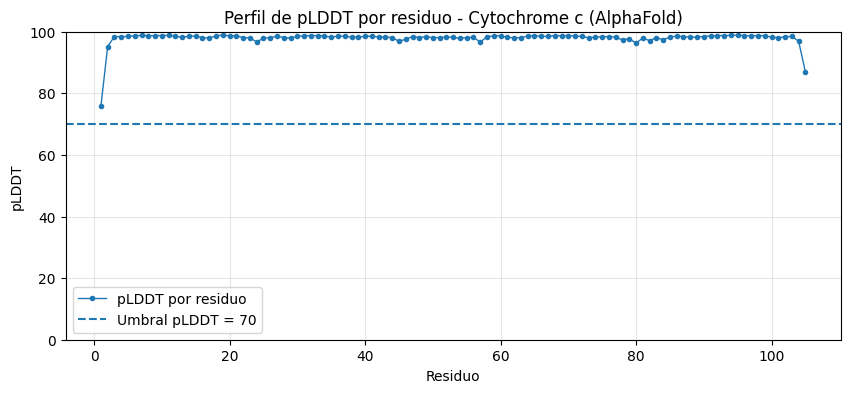

In [31]:
residue_indices = np.arange(1, len(plddt_values) + 1)

plt.figure(figsize=(10, 4))
plt.plot(residue_indices, plddt_values, marker='.', linewidth=1, label='pLDDT por residuo')

plt.axhline(70, linestyle='--', label='Umbral pLDDT = 70')

plt.xlabel('Residuo')
plt.ylabel('pLDDT')
plt.title('Perfil de pLDDT por residuo - Cytochrome c (AlphaFold)')
plt.ylim(0, 100)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

El pLDDT se mantiene muy alto y estable en casi toda la proteína, con valores cercanos a 100. Solo los extremos muestran una pequeña bajada, algo normal porque suelen ser zonas más flexibles. 

Todos los residuos están por encima de 70, así que la estructura completa es fiable y está bien predicha por AlphaFold.

## Bloque 5 - Colorear la proteína por pLDDT

Visualizar la estructura tridimensional aplicando el esquema de colores oficial de AlphaFold, que permite identificar
fácilmente las regiones más confiables del modelo. Para ello, utilizar py3Dmol para cargar el archivo PDB y asignar un
color distinto a cada residuo en función de su pLDDT:

    • azul para valores muy altos
    • cian para altos
    • amarillo para intermedios
    • naranja/rojo para baja confianza.

Esta representación facilita distinguir visualmente las zonas bien definidas de las más flexibles o inciertas. Una vez
generada la visualización en Python, compararla con la mostrada en la página de AlphaFold para tu proteína y
comprobar si ambas coinciden en la distribución de colores, es decir, si las regiones de alta y baja confianza aparecen
en las mismas posiciones.

In [32]:
import py3Dmol

view = py3Dmol.view(width=800, height=600)

with open(pdb_file, 'r') as f:
    view.addModel(f.read(), 'pdb')

view.setStyle({}, {'cartoon': {}})

for i, score in enumerate(plddt_values, start=1):
    if score > 90:
        color = 'blue'
    elif score > 70:
        color = 'cyan'
    elif score > 50:
        color = 'yellow'
    else:
        color = 'orange'

    view.addStyle({'resi': str(i)}, {'cartoon': {'color': color}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Al compararla con la estructura de la página web de AlphaFold, observamos que las regiones se colorean de manera exactamente igual.

![AlphaFold visualization](images/visualization_web_alphafold.png)

## Bloque 6 - Comparar con estructura experimental (1HRC)

Investigar si existe alguna estructura experimental disponible para tu proteína en bases de datos como el Protein Data
Bank (PDB). Si se encuentra un modelo experimental apropiado (relacionado con los ids mostrados en la tabla
principal), descaragrlo en formato PDB y compáralo con la predicción de AlphaFold alineando ambas estructuras a
través de los átomos Cα. Para ello, calcular el RMSD (Root Mean Square Deviation), una métrica que cuantifica la
similitud global entre las estructuras: valores bajos indican alta concordancia y, por tanto, una predicción más precisa.
Además, generar una visualización superpuesta de ambos modelos para identificar posibles diferencias locales o
regiones especialmente divergentes. En caso de que no exista ninguna estructura experimental disponible para tu
proteína, simplemente indicarlo en la memoria y continuar con los análisis posteriores.

In [33]:
import requests
import numpy as np
from Bio.PDB import PDBParser, Superimposer, PDBIO

In [34]:
folder = "pdb_experimental"

os.makedirs(folder, exist_ok=True)

pdb_id = "1HRC"
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"

pdb_exp_file = os.path.join(folder, f"{pdb_id}.pdb")

r = requests.get(url)
with open(pdb_exp_file, "wb") as f:
    f.write(r.content)

print("PDB experimental guardado en:", pdb_exp_file)

PDB experimental guardado en: pdb_experimental/1HRC.pdb


## Bloque 7 - Mapa de distancias internas CA–CA

Analizar la organización espacial de la proteína generando un mapa de distancias internas entre todos los átomos Cα
del modelo de AlphaFold. Para ello se debe extraer las coordenadas tridimensionales de cada Cα y construir una matriz
en la que cada elemento dist[i,j] represente la distancia entre los residuos i y j. Este mapa de calor permite identificar
patrones estructurales relevantes, como:
• regiones compactas, donde las distancias son pequeñas y aparece un patrón denso y continuo;
• regiones flexibles o extendidas, donde las distancias aumentan y el mapa muestra zonas más dispersas.
Una vez obtenido el mapa, interpretarlo relacionándolo con la información de confianza proporcionada por AlphaFold:
normalmente, las regiones compactas coinciden con valores altos de pLDDT, mientras que las zonas más difusas suelen
corresponder a segmentos menos confiables o potencialmente desordenados.

In [35]:
# TODO: Crear mapa de distancias

# import numpy as np
# import matplotlib.pyplot as plt

# # Extraer coordenadas CA
# # Calcular matriz de distancias
# # Visualizar con heatmap